<a href="https://colab.research.google.com/github/vkjadon/tf/blob/main/tf203-dogsvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
!ls

drive  sample_data


In [5]:
data_dir = 'drive/MyDrive/datasets/dog-vs-cat/train/'

In [6]:
!pwd

/content


In [7]:
os.listdir(data_dir)

['dog', 'cat']

In [8]:
#os.listdir(os.path.join(data_dir,'cat'))

In [9]:
for image_class in os.listdir(data_dir):
  print("Class - ", image_class)
  i=0
  for image in os.listdir(os.path.join(data_dir, image_class)):
    i=i+1
  print(i)


Class -  dog
500
Class -  cat
501


##Show list in the files in the above directory
The below method will store the path in `image_path`. Can aslo directly do by storing the string in the variable as we did for `data_dir`.

In [10]:
image_path=os.path.join(data_dir, 'cat')
print(type(image_path))
print(image_path)

<class 'str'>
drive/MyDrive/datasets/dog-vs-cat/train/cat


In [11]:
image_list=os.listdir(image_path)
print(image_list)

['cat.10018.jpg', 'cat.10030.jpg', 'cat.10025.jpg', 'cat.1007.jpg', 'cat.1010.jpg', 'cat.10146.jpg', 'cat.10151.jpg', 'cat.10144.jpg', 'cat.10152.jpg', 'cat.10150.jpg', 'cat.1013.jpg', 'cat.10145.jpg', 'cat.1012.jpg', 'cat.10193.jpg', 'cat.10179.jpg', 'cat.10178.jpg', 'cat.10191.jpg', 'cat.10187.jpg', 'cat.10233.jpg', 'cat.10232.jpg', 'cat.10344.jpg', 'cat.10346.jpg', 'cat.10350.jpg', 'cat.10352.jpg', 'cat.10391.jpg', 'cat.1038.jpg', 'cat.10385.jpg', 'cat.10421.jpg', 'cat.10436.jpg', 'cat.10554.jpg', 'cat.10596.jpg', 'cat.10555.jpg', 'cat.10568.jpg', 'cat.10582.jpg', 'cat.10597.jpg', 'cat.10608.jpg', 'cat.10634.jpg', 'cat.10620.jpg', 'cat.10637.jpg', 'cat.10623.jpg', 'cat.10757.jpg', 'cat.10805.jpg', 'cat.10781.jpg', 'cat.10795.jpg', 'cat.10839.jpg', 'cat.10807.jpg', 'cat.10813.jpg', 'cat.10959.jpg', 'cat.10964.jpg', 'cat.10970.jpg', 'cat.11070.jpg', 'cat.11059.jpg', 'cat.11058.jpg', 'cat.11066.jpg', 'cat.11064.jpg', 'cat.11105.jpg', 'cat.11111.jpg', 'cat.11104.jpg', 'cat.11138.jpg', '

#Display a Random Image

In [12]:
import random
import cv2
from matplotlib import pyplot as plt

In [13]:
random_image=random.choice(os.listdir(image_path))
print(random_image)
print(type(random_image))

cat.7516.jpg
<class 'str'>


<class 'numpy.ndarray'>


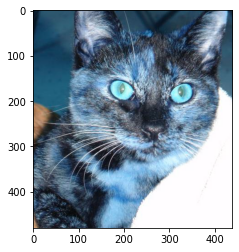

In [14]:
img = cv2.imread(os.path.join(data_dir, 'cat', random_image))
print(type(img))
plt.imshow(img.astype(int))
plt.show()

##Load and Investigate Data
Generates a `tf.data.Dataset` from image files in a directory. It is loaded in the memory and is used as and when desired.   
In other word, the following command will build us the data pipeline.


In [15]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1001 files belonging to 2 classes.


In [16]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

To use the data output from the data generator we have to use the iterator. This allows us to access the generated data pipeline. Also, we can grab the consecutive batches using the `next` method.

In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
data_iterator

`next()` method is used to grab the data from input pipeline

In [19]:
data_batch = data_iterator.next()

In [20]:
print(type(data_batch))
print(type(data_batch[0]))
print(type(data_batch[1]))
print(len(data_batch))
print(data_batch[0].shape)
#print(data_batch[0])
#print(data_batch[1])
#print(data_batch[0][0])
#print(data_batch)

<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
2
(32, 256, 256, 3)


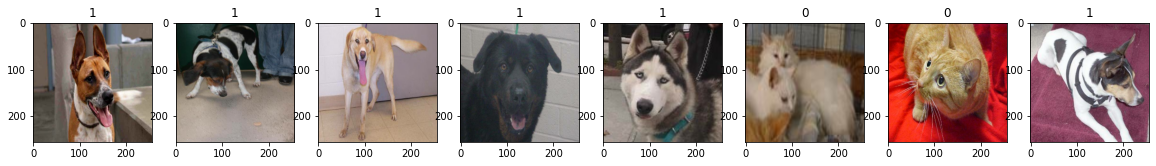

In [21]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(data_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(data_batch[1][idx])

In [22]:
data_batch[0][0].min()

0.0

##Setting Parameters as Required

In [23]:
batch_size = 32 #Number of images per batch
img_height = 224
img_width = 224

In [24]:
train_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1001 files belonging to 2 classes.
Using 801 files for training.


In [25]:
len(train_data)

26

In [26]:
val_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1001 files belonging to 2 classes.
Using 200 files for validation.


In [27]:
len(val_data)

7

##Create Sequential Model

In [28]:
class_names = train_data.class_names
print(class_names)
num_classes = len(class_names)

['cat', 'dog']


In [29]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [30]:
import tensorflow as tf
from keras import layers
from keras.models import Sequential

In [31]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [34]:
logdir = 'drive/MyDrive/datasets/dog-vs-cat/logs/'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
epochs=10
hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[tensorboard_callback])

Epoch 1/10
26/26 [==============================] - 111s 2s/step - loss: 0.9537 - accuracy: 0.5331 - val_loss: 0.7148 - val_accuracy: 0.4350
Epoch 2/10
26/26 [==============================] - 39s 1s/step - loss: 0.6901 - accuracy: 0.5169 - val_loss: 0.6933 - val_accuracy: 0.4600
Epoch 3/10
26/26 [==============================] - 42s 2s/step - loss: 0.6796 - accuracy: 0.5618 - val_loss: 0.6698 - val_accuracy: 0.6200
Epoch 4/10
26/26 [==============================] - 40s 2s/step - loss: 0.5943 - accuracy: 0.6704 - val_loss: 0.6303 - val_accuracy: 0.6300
Epoch 6/10
26/26 [==============================] - 38s 2s/step - loss: 0.4974 - accuracy: 0.7665 - val_loss: 0.5884 - val_accuracy: 0.6900
Epoch 7/10
26/26 [==============================] - 38s 1s/step - loss: 0.4223 - accuracy: 0.8027 - val_loss: 0.6005 - val_accuracy: 0.6650
Epoch 8/10
26/26 [==============================] - 39s 1s/step - loss: 0.3232 - accuracy: 0.8664 - val_loss: 0.6462 - val_accuracy: 0.6800
Epoch 9/10
26/26 [=

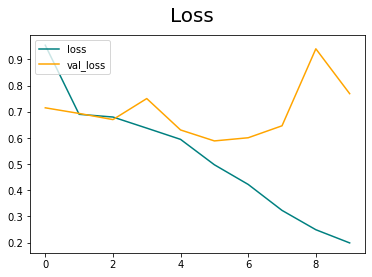

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

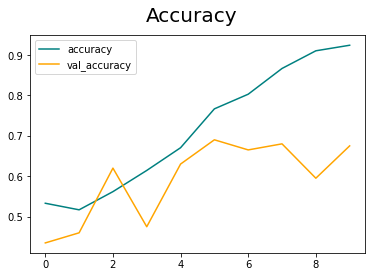

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [39]:
test_dir = 'drive/MyDrive/datasets/dog-vs-cat/test/'

In [40]:
image_path=os.path.join(test_dir, 'dog')
random_image=random.choice(os.listdir(image_path))
random_image

'dog.11705.jpg'

<class 'numpy.ndarray'>


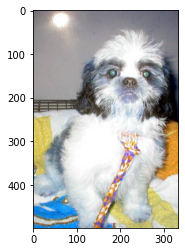

In [41]:
img = cv2.imread(os.path.join(test_dir, 'dog', random_image))
print(type(img))
plt.imshow(img.astype(int))
plt.show()

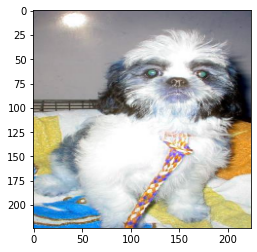

In [42]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

1/1 [==============================] - 0s 34ms/step
This image most likely belongs to cat with a 98.46 percent confidence.
[[ 3.0071363 -1.1507077]]
tf.Tensor([0.98459965 0.01540036], shape=(2,), dtype=float32)


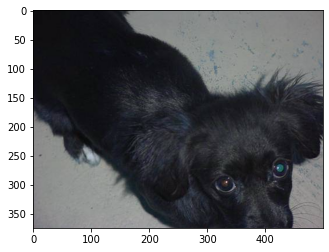

In [58]:
image_path=os.path.join(test_dir, 'dog')
random_image=random.choice(os.listdir(image_path))
img = cv2.imread(os.path.join(test_dir, 'dog', random_image))
resize = tf.image.resize(img, (224,224))
predictions=model.predict(tf.expand_dims(resize, 0))
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print(predictions)
print(score)
plt.imshow(img.astype(int))
plt.show()

In [46]:
test_data = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 2 classes.


In [47]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()